In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  workclass_Federal-gov  workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               0                      0                    0   

   workclass_Private  ...  origin_descent_Asia  origin_descent_Carib  \
0                  0  ...                    0                     0   
1                  0  ...                    0                     0   
2                  1  ...                    0                     0   
3                  1  ...                    0                     0   
4                  1  ...                    0                     1   

   origin_descent_Central America  origin_descent_Europe  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   origin_descent_North America  origin_descent_South America  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   origin_descent_United States  age_range_adult  age_range_child  \
0                             1                1                0   
1                             1                1                0   
2                             1                1                0   
3                             1                1                0   
4                             0                1                0   

   age_range_senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 64 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
                                ...  
origin_descent_South America    int64
origin_descent_United States    int64
age_range_adult                 int64
age_range_child                 int64
age_range_senior                int64
Length: 64, dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             30162 non-null  int64
 1   fnlwght                         30162 non-null  int64
 2   education_num_yr                30162 non-null  int64
 3   cap_gain                        30162 non-null  int64
 4   cap_loss                        30162 non-null  int64
 5   hours_per_week                  30162 non-null  int64
 6   income_outcome                  30162 non-null  int64
 7   workclass_Federal-gov           30162 non-null  int64
 8   workclass_Local-gov             30162 non-null  int64
 9   workclass_Private               30162 non-null  int64
 10  workclass_Self-emp-inc          30162 non-null  int64
 11  workclass_Self-emp-not-inc      30162 non-null  int64
 12  workclass_State-gov             30162 non-null  int64
 13  w

In [7]:
ml_df = ml_data.copy()

In [8]:
ml_df.shape

(30162, 64)

In [9]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 






In [10]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [11]:
ml_df.shape

(30162, 59)

====Iteration 0  ====

Accuracy:  0.8451848168407095 

f1_score: 0.6591240875912409 

precision_score: 0.7401639344262295 

roc_auc_score: 0.7619187114417998 

Confusion Matrix: 

      0    1
0  4196  317
1   617  903 

Train Time:  0.7891565430000003 s

====Iteration 1  ====

Accuracy:  0.8415382065307475 

f1_score: 0.6510948905109489 

precision_score: 0.7234387672343877 

roc_auc_score: 0.7582809900828099 

Confusion Matrix: 

      0    1
0  4185  341
1   615  892 

Train Time:  1.240822531 s

====Iteration 2  ====

Accuracy:  0.8453505718547986 

f1_score: 0.6519955240581872 

precision_score: 0.7099918765231519 

roc_auc_score: 0.7624310231966713 

Confusion Matrix: 

      0    1
0  4226  357
1   576  874 

Train Time:  1.2751365559999996 s



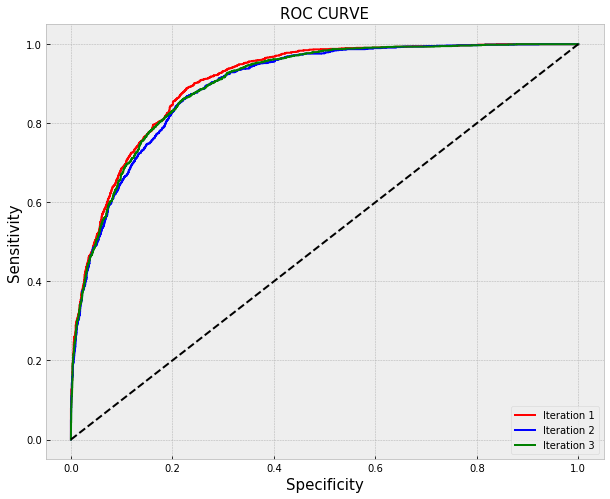

In [12]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
##https://docs.python.org/3/library/time.html#functions

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


#lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight=None, solver='saga', l1_ratio = 0.5 )
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    t = time.process_time()
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions
    
    elapsed_time = time.process_time() - t
    

    # now let's get the accuracy and confusion matrix for these iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [13]:
weights

array([[ 0.49805124,  0.07014541,  0.86774564,  2.34529335,  0.26514559,
         0.25529907,  0.0928506 , -0.04241911,  0.03545264,  0.06145315,
        -0.07669147, -0.0449828 , -0.10969717, -0.02258269, -0.01808452,
        -0.02129541,  0.24063913, -0.18575846, -0.1546289 , -0.07821317,
        -0.23709143, -0.30782215,  0.18503539,  0.08289486,  0.07518554,
         0.10723845, -0.02462851,  0.48141308, -0.20150045, -0.10305512,
        -0.50618446, -0.16935838,  0.48120913,  0.36713244,  0.03703181,
         0.20472949, -0.07039028, -0.0662309 ,  0.03723871,  0.02734869,
        -0.05358261,  0.12254143,  0.03046452,  0.21474204, -0.04895327,
         0.05192327, -0.04555512, -0.01261401,  0.0294858 , -0.03263587,
        -0.00484159, -0.02100968,  0.0447807 , -0.01254084, -0.03561855,
         0.03703181,  0.13509752, -0.07811095, -0.10908819],
       [ 0.50027924,  0.08624   ,  0.93728655,  2.39623276,  0.25856441,
         0.25969878,  0.09178032, -0.03475851,  0.03475581,  0.

In [14]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [15]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    iter_num =+1
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8390518813194099 

f1_score: 0.6420936232952451 

precision_score: 0.7222222222222222 

roc_auc_score: 0.7519763419552473 

Confusion Matrix: 

      0    1
0  4191  335
1   636  871 

Train Time:  0.1409412269999999 s

====Iteration 1  ====

Accuracy:  0.8322559257417537 

f1_score: 0.6152091254752852 

precision_score: 0.7171985815602837 

roc_auc_score: 0.7341056477040397 

Confusion Matrix: 

      0    1
0  4212  319
1   693  809 

Train Time:  0.371490981 s

====Iteration 2  ====

Accuracy:  0.8370628211503398 

f1_score: 0.6266616027345234 

precision_score: 0.7167680278019114 

roc_auc_score: 0.7425237768626728 

Confusion Matrix: 

      0    1
0  4225  326
1   657  825 

Train Time:  0.39781856000000015 s



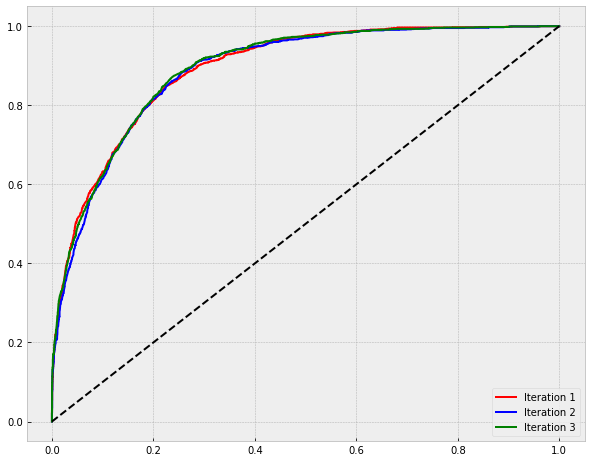

In [16]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    
    t = time.process_time()
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])
    
    elapsed_time = time.process_time() - t
    


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    f1_scor_ = mt.f1_score(y[test_indices],y_hat)
    prec_scor_ = mt.precision_score(y[test_indices], y_hat)
    auc_scor_ = mt.roc_auc_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [17]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


from sklearn.svm import SVC


svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num += 1
    
    

====Iteration 0  ====

Accuracy:  0.8498259572352064 

f1_score: 0.6547256097560976 

precision_score: 0.72982158028887 

roc_auc_score: 0.7621502719583746 

Confusion Matrix: 

      0    1
0  4268  318
1   588  859 

Train Time:  39.483017461 s

====Iteration 1  ====

Accuracy:  0.8576164428973977 

f1_score: 0.6781566129636568 

precision_score: 0.7497928748964374 

roc_auc_score: 0.77647317696978 

Confusion Matrix: 

      0    1
0  4269  302
1   557  905 

Train Time:  38.743433532 s

====Iteration 2  ====

Accuracy:  0.8516492623901873 

f1_score: 0.6613696556942867 

precision_score: 0.7476475620188195 

roc_auc_score: 0.7641185982190982 

Confusion Matrix: 

      0    1
0  4264  295
1   600  874 

Train Time:  39.000649674 s



In [18]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for (train_indices, test_indices) in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

In [19]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions




# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
t = time.process_time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

elapsed_time = time.process_time() - t


acc = mt.accuracy_score(y_test,y_hat)
f1_scor_ = mt.f1_score(y_test,y_hat)
prec_scor_ = mt.precision_score(y_test, y_hat)
auc_scor_ = mt.roc_auc_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("Accuracy: ", acc, "\n" )
print("f1_score:", f1_scor_, "\n")
print("precision_score:",prec_scor_ , "\n")
print("roc_auc_score:",auc_scor_ , "\n")
print("Confusion Matrix: \n")
print (pd.DataFrame(conf),"\n")
print("Train Time: ", elapsed_time,  "s\n")





Accuracy:  0.8481684070943146 

f1_score: 0.6607407407407406 

precision_score: 0.7514743049705139 

roc_auc_score: 0.7621458422287081 

Confusion Matrix: 

      0    1
0  4225  295
1   621  892 

Train Time:  42.82636616799999 s



In [20]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8402, 59)
(8402,)
[4210 4192]


[[ 2.47898603e-01  5.44843840e-02  6.51431215e-01  1.76179263e+00
   2.02840385e-01  1.18466629e-01  4.76237249e-02 -1.47705955e-02
   2.65746779e-02  4.91044721e-02 -7.03830748e-02 -2.80520641e-02
  -1.39770434e-02 -3.62104306e-02 -6.16130537e-03 -7.08169405e-02
   2.01207763e-01 -1.06164830e-01 -8.67543862e-02 -7.96967008e-02
  -1.55873430e-01 -3.26179390e-02  1.52315410e-01  3.85294872e-02
   4.35528921e-02  8.51463154e-02 -4.92258551e-02  3.29873325e-01
  -2.06000039e-01 -7.10974111e-02 -2.39820825e-01 -1.15518483e-01
   2.83589251e-01  1.84984843e-01  3.51715727e-03  1.13531135e-01
  -6.47378638e-02  2.36501252e-03  7.94388972e-02 -2.24288763e-02
  -3.75181998e-02  1.41501661e-01 -2.44706389e-02  1.73212744e-01
  -5.82251696e-02  3.33628007e-02 -9.05131324e-03 -3.49969158e-02
   1.66799409e-02 -4.61927656e-02 -1.14527931e-02 -1.74655787e-02
   5.09013032e-03 -1.15780580e-02 -1.52379389e-02  3.51715727e-03
   7.43978458e-02  5.68434189e-14 -8.64555445e-02]]


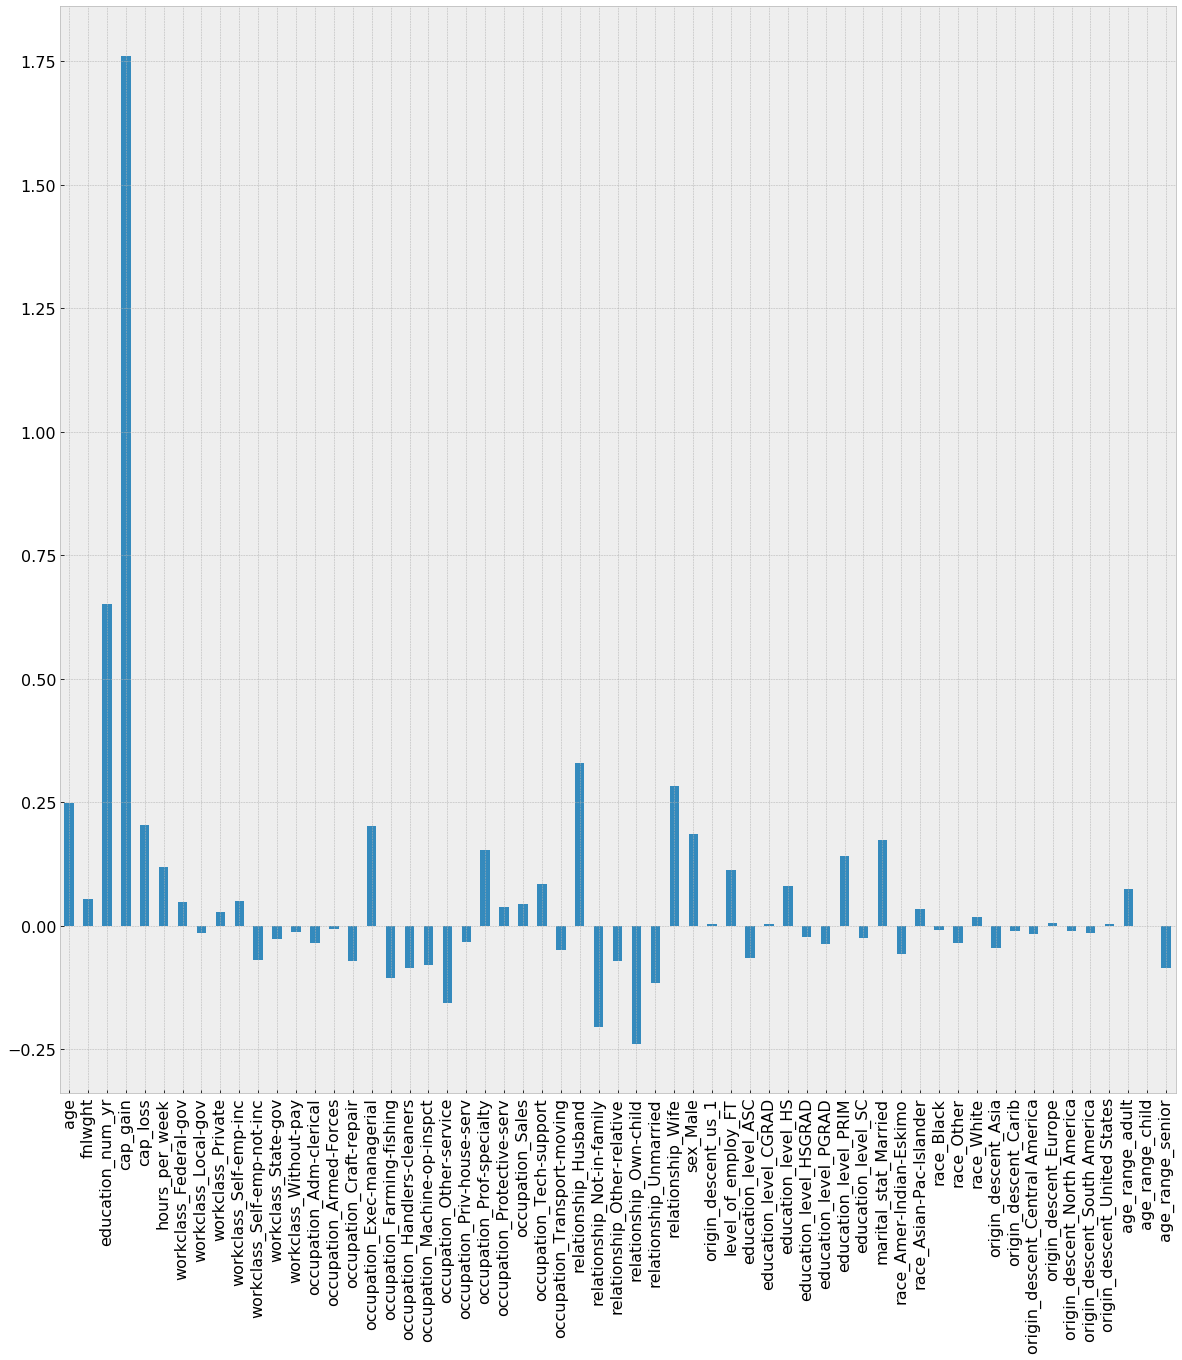

In [21]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [22]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the income_outcomw Column to the pandas support vectors dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 21549 to 25784
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             8402 non-null   int64
 1   fnlwght                         8402 non-null   int64
 2   education_num_yr                8402 non-null   int64
 3   cap_gain                        8402 non-null   int64
 4   cap_loss                        8402 non-null   int64
 5   hours_per_week                  8402 non-null   int64
 6   workclass_Federal-gov           8402 non-null   int64
 7   workclass_Local-gov             8402 non-null   int64
 8   workclass_Private               8402 non-null   int64
 9   workclass_Self-emp-inc          8402 non-null   int64
 10  workclass_Self-emp-not-inc      8402 non-null   int64
 11  workclass_State-gov             8402 non-null   int64
 12  workclass_Without-pay           8402 non-null   int64
 13

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

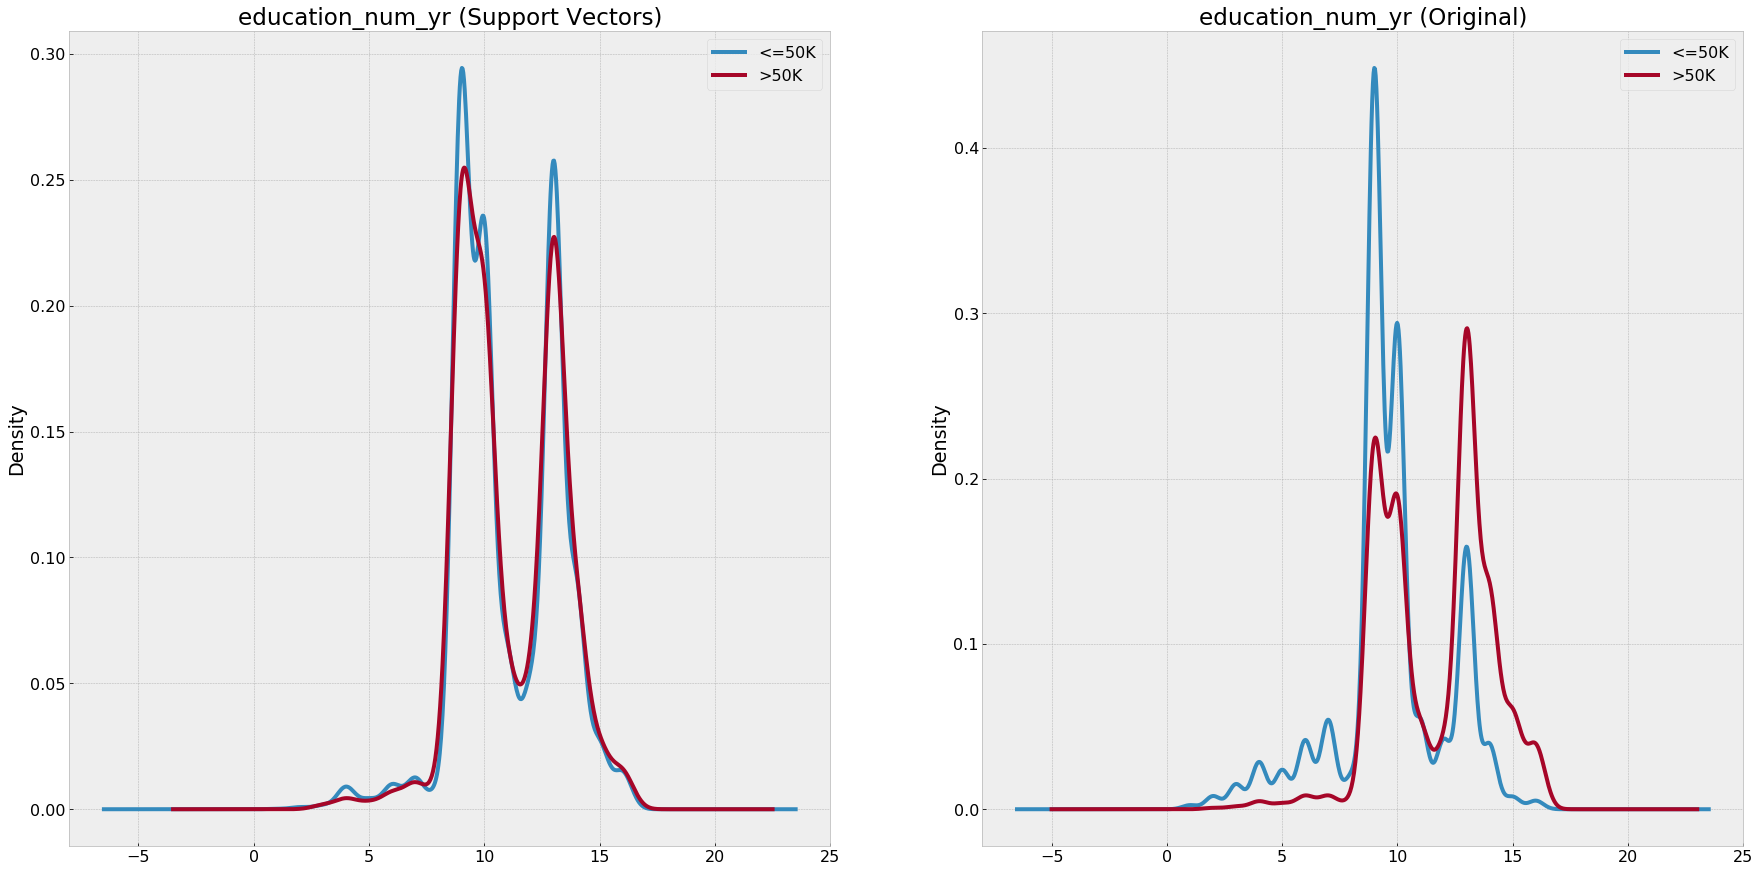

<Figure size 720x288 with 0 Axes>

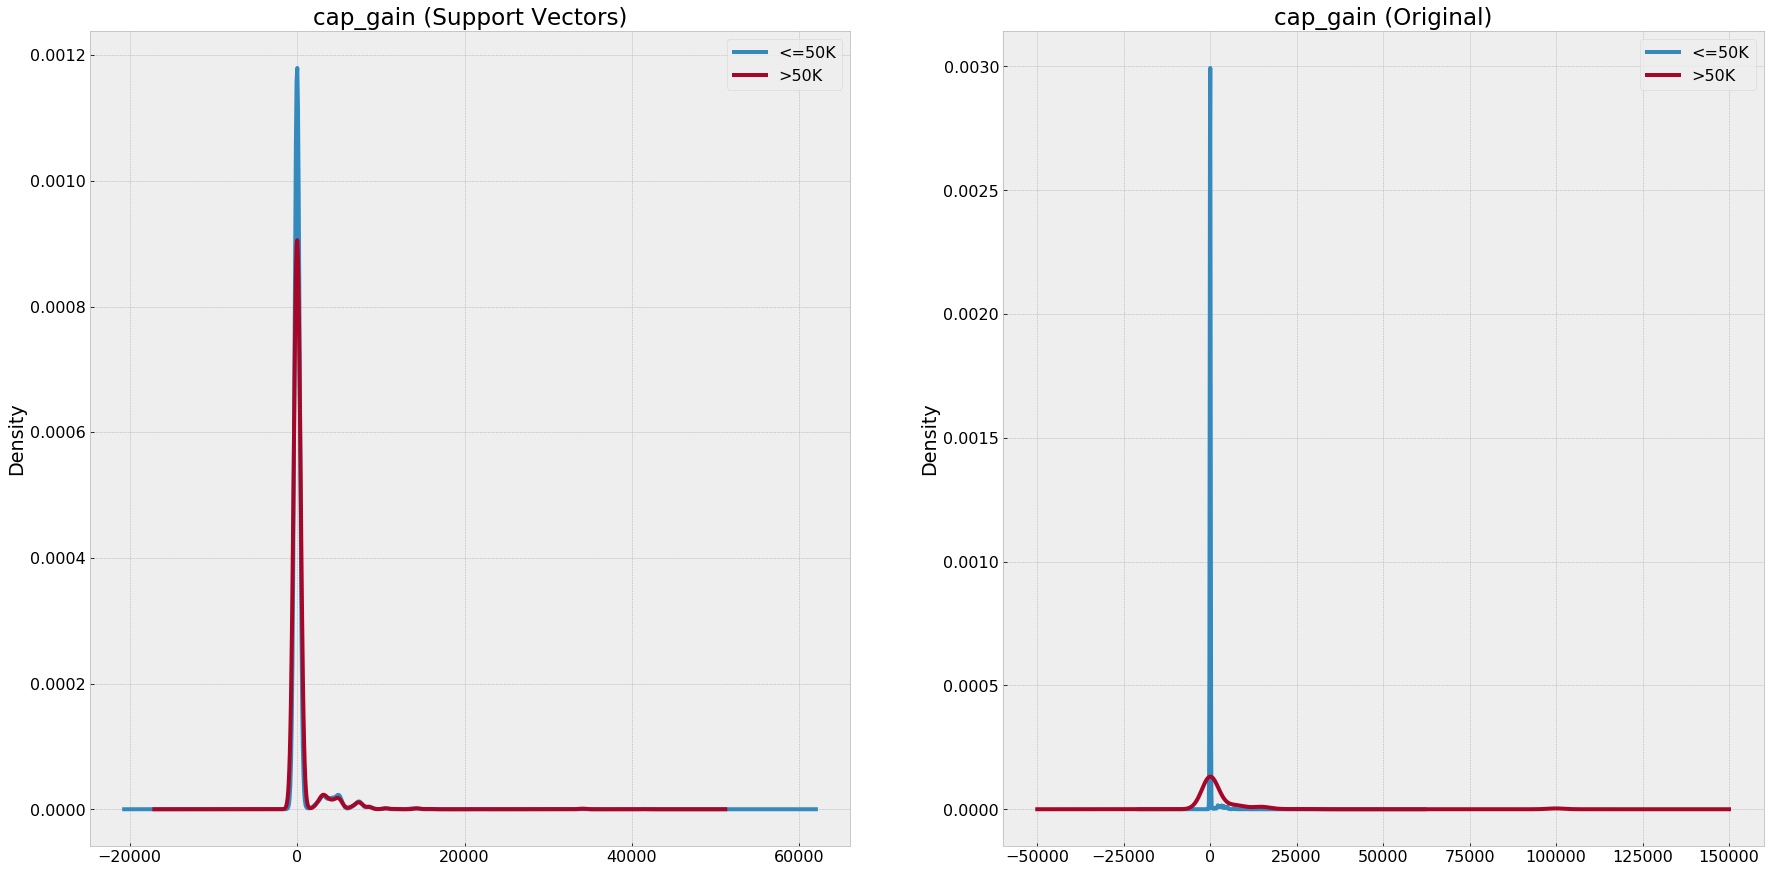

<Figure size 720x288 with 0 Axes>

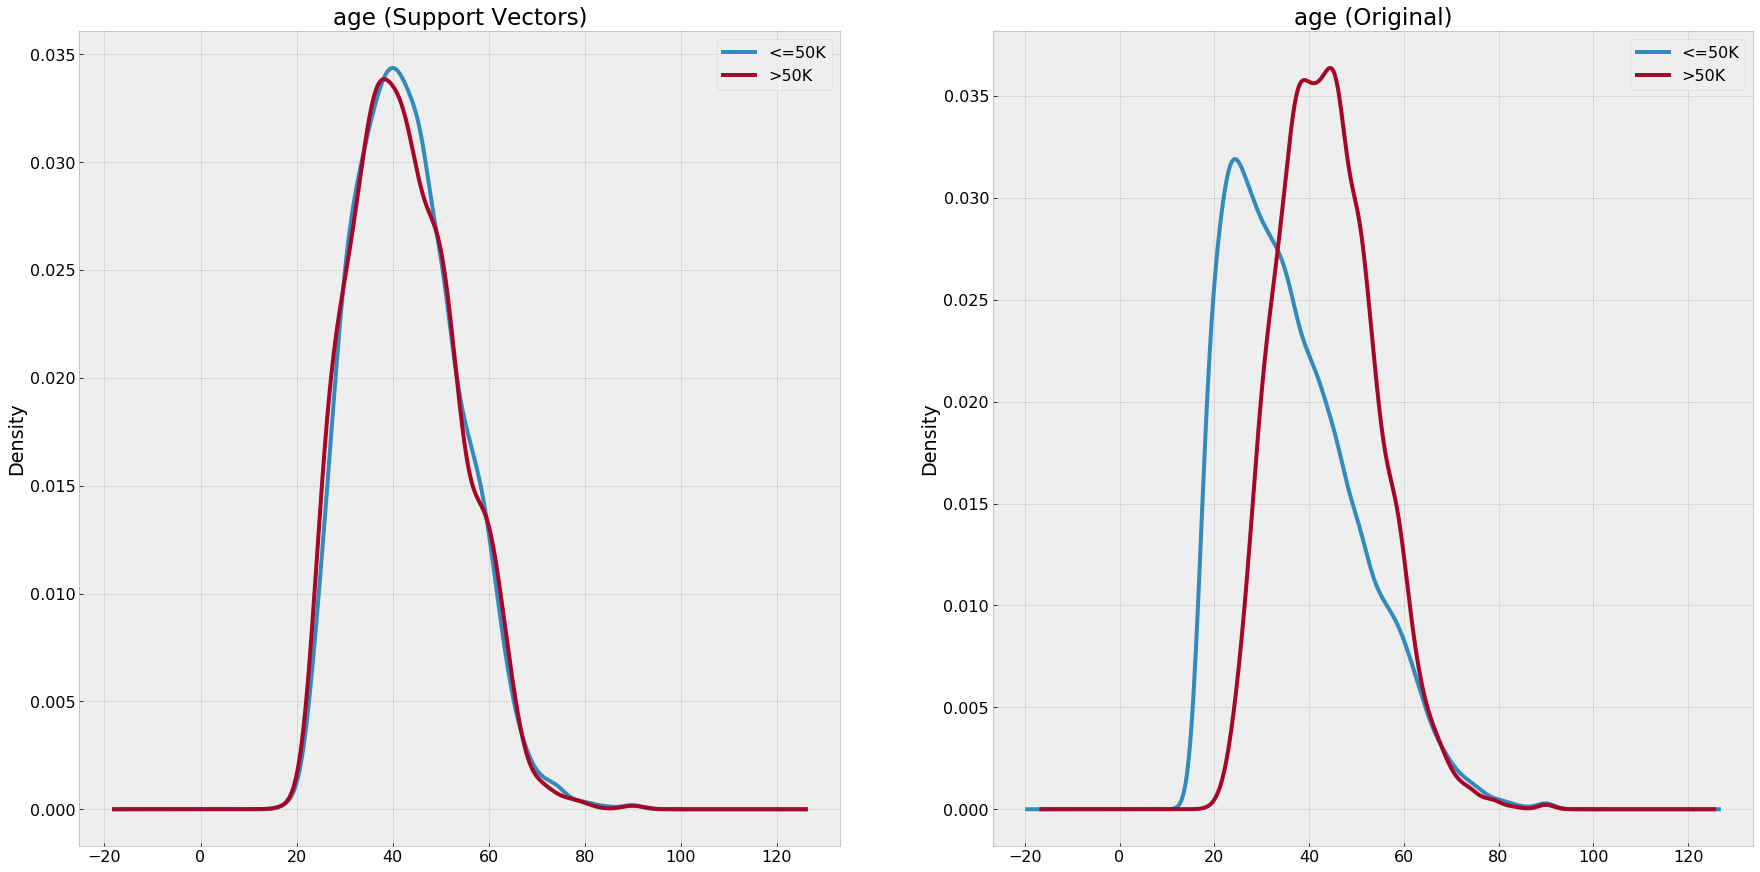

<Figure size 720x288 with 0 Axes>

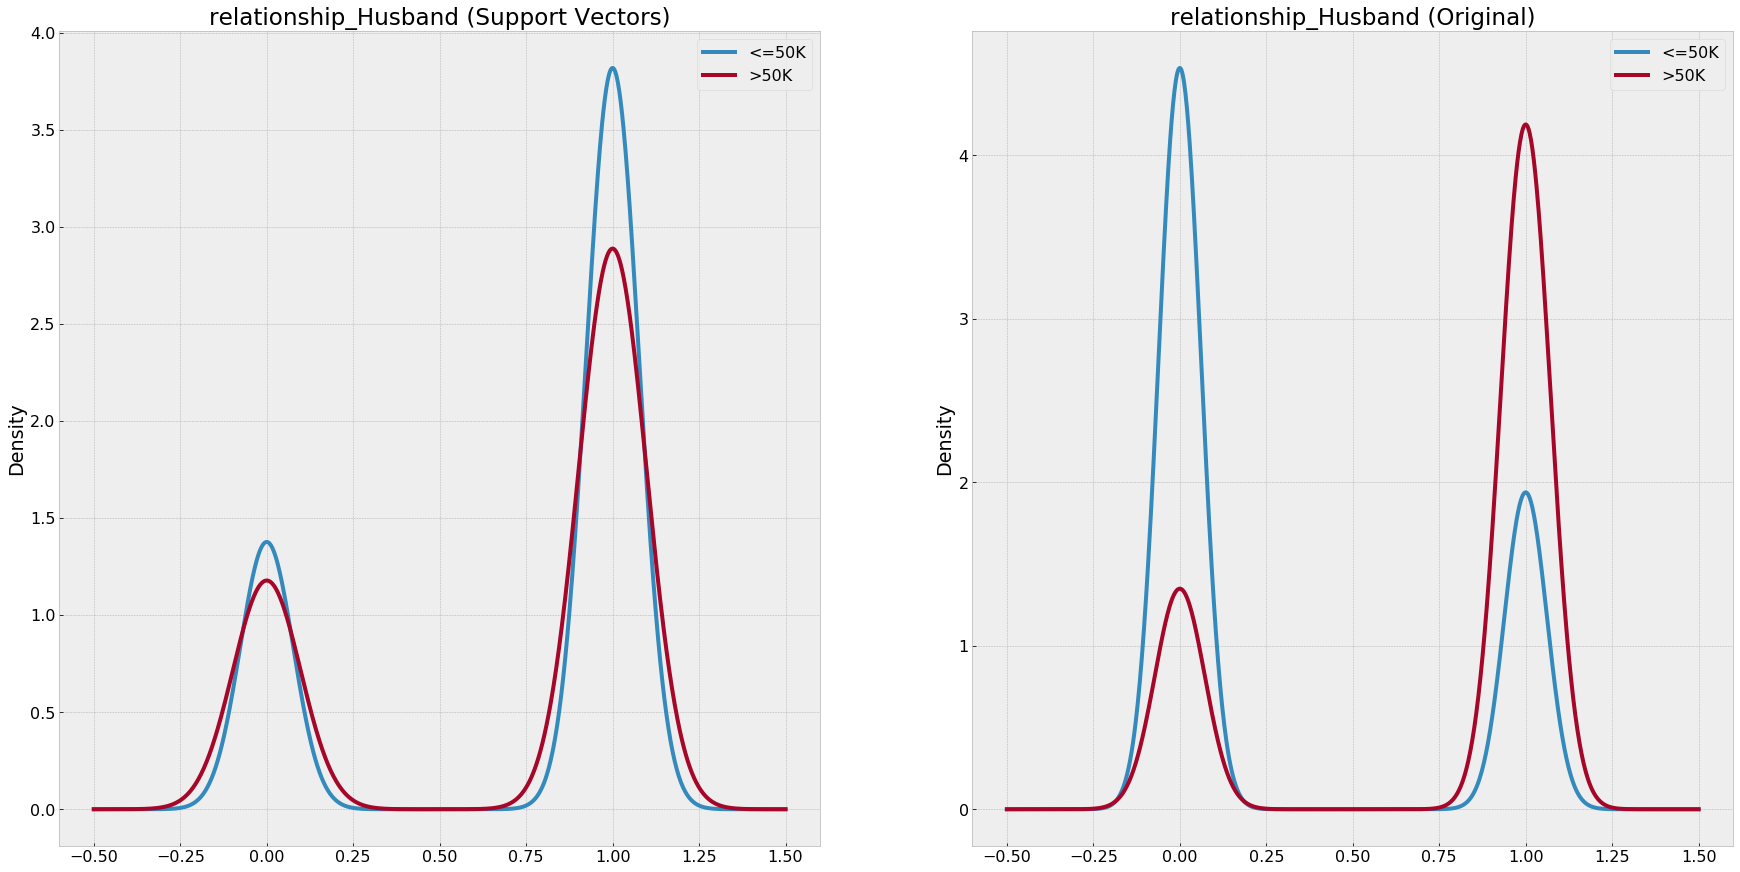

<Figure size 720x288 with 0 Axes>

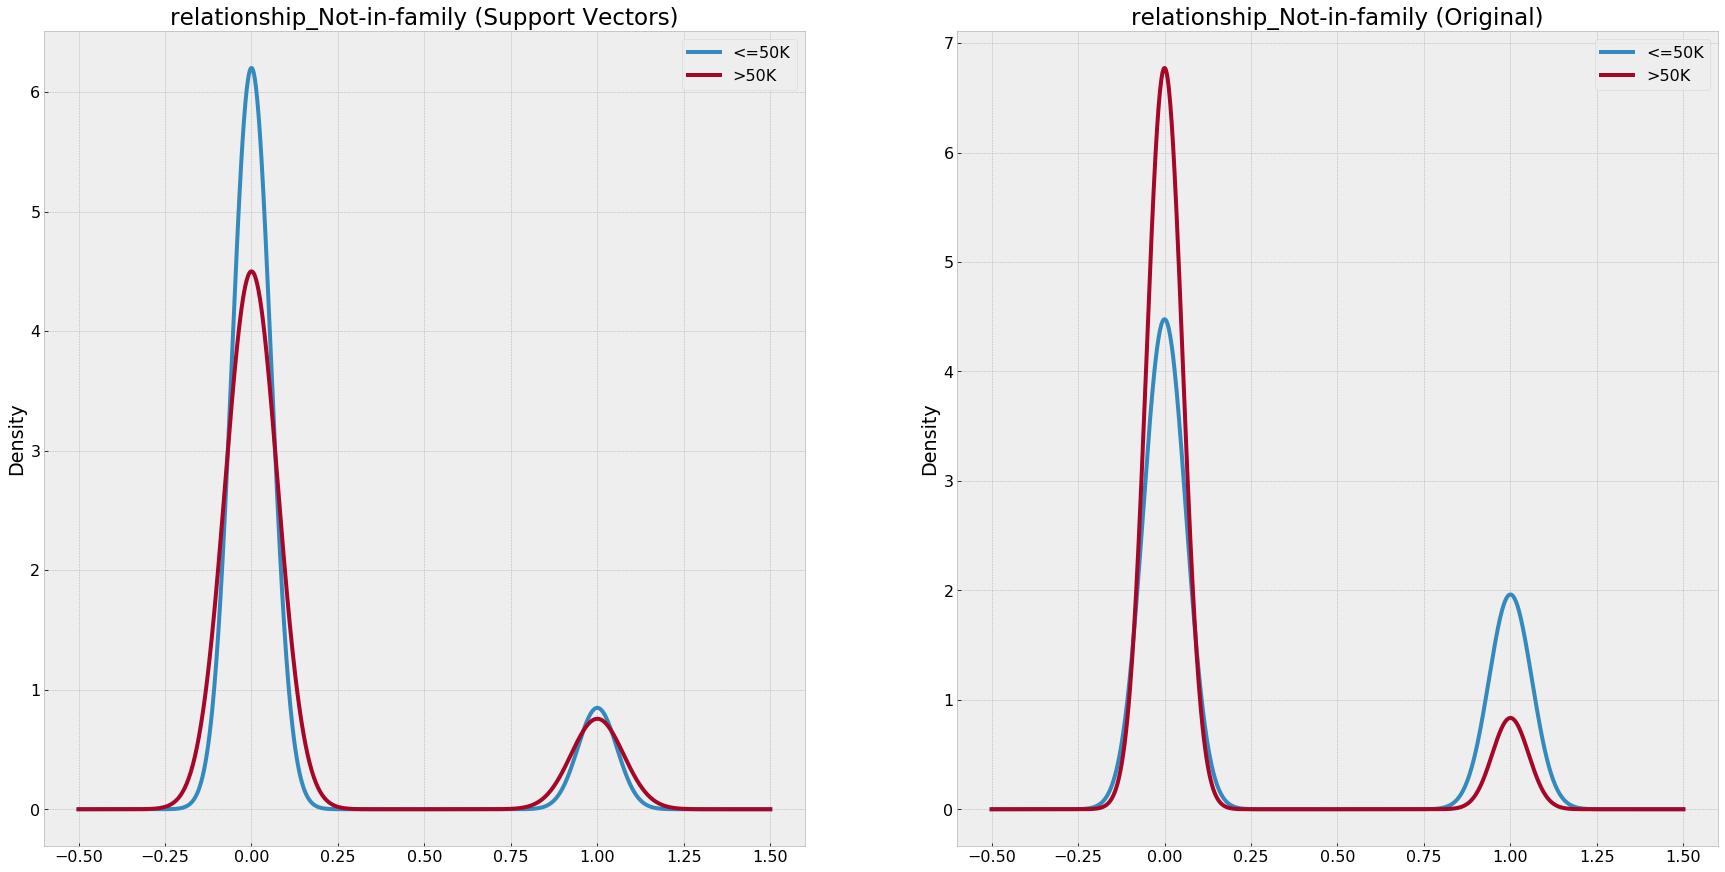

<Figure size 720x288 with 0 Axes>

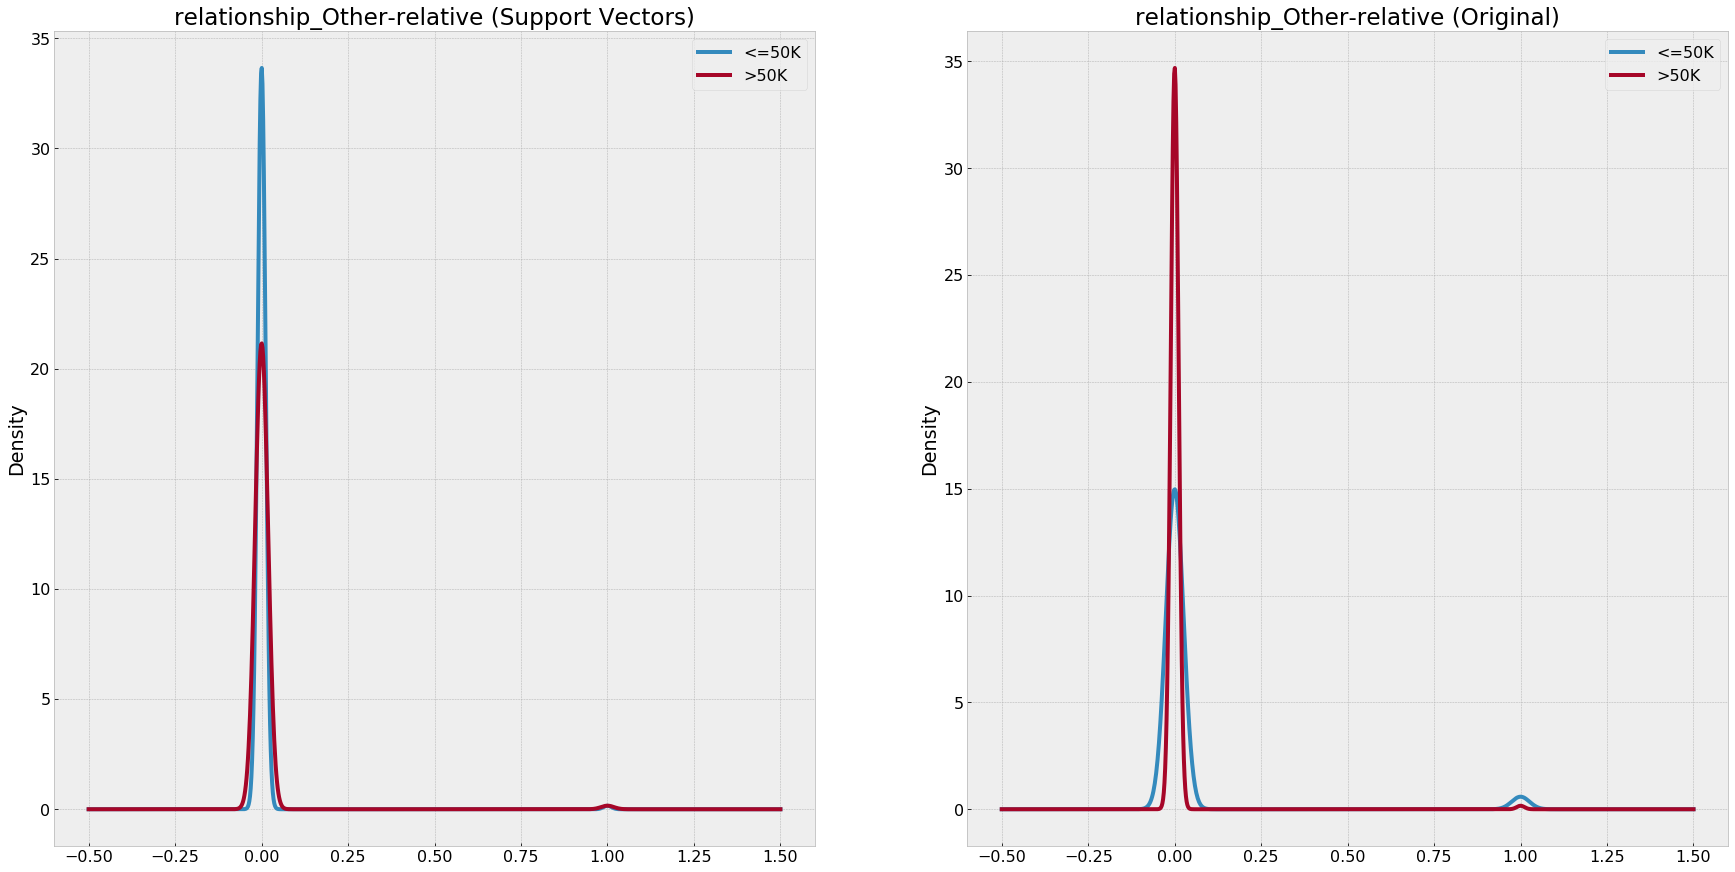

<Figure size 720x288 with 0 Axes>

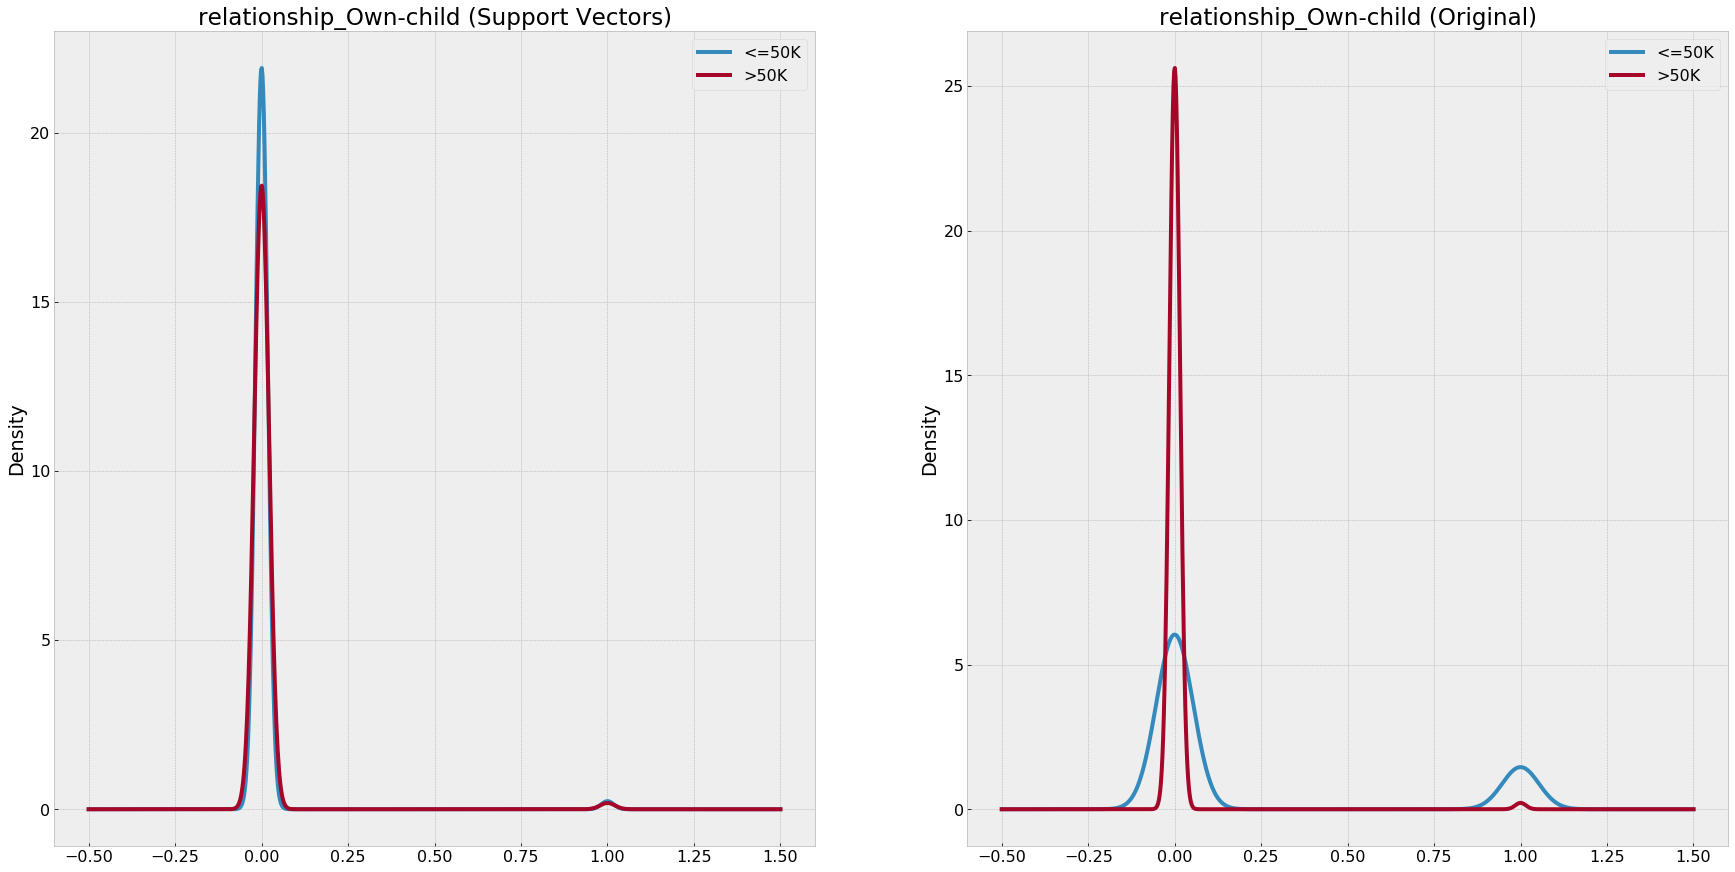

<Figure size 720x288 with 0 Axes>

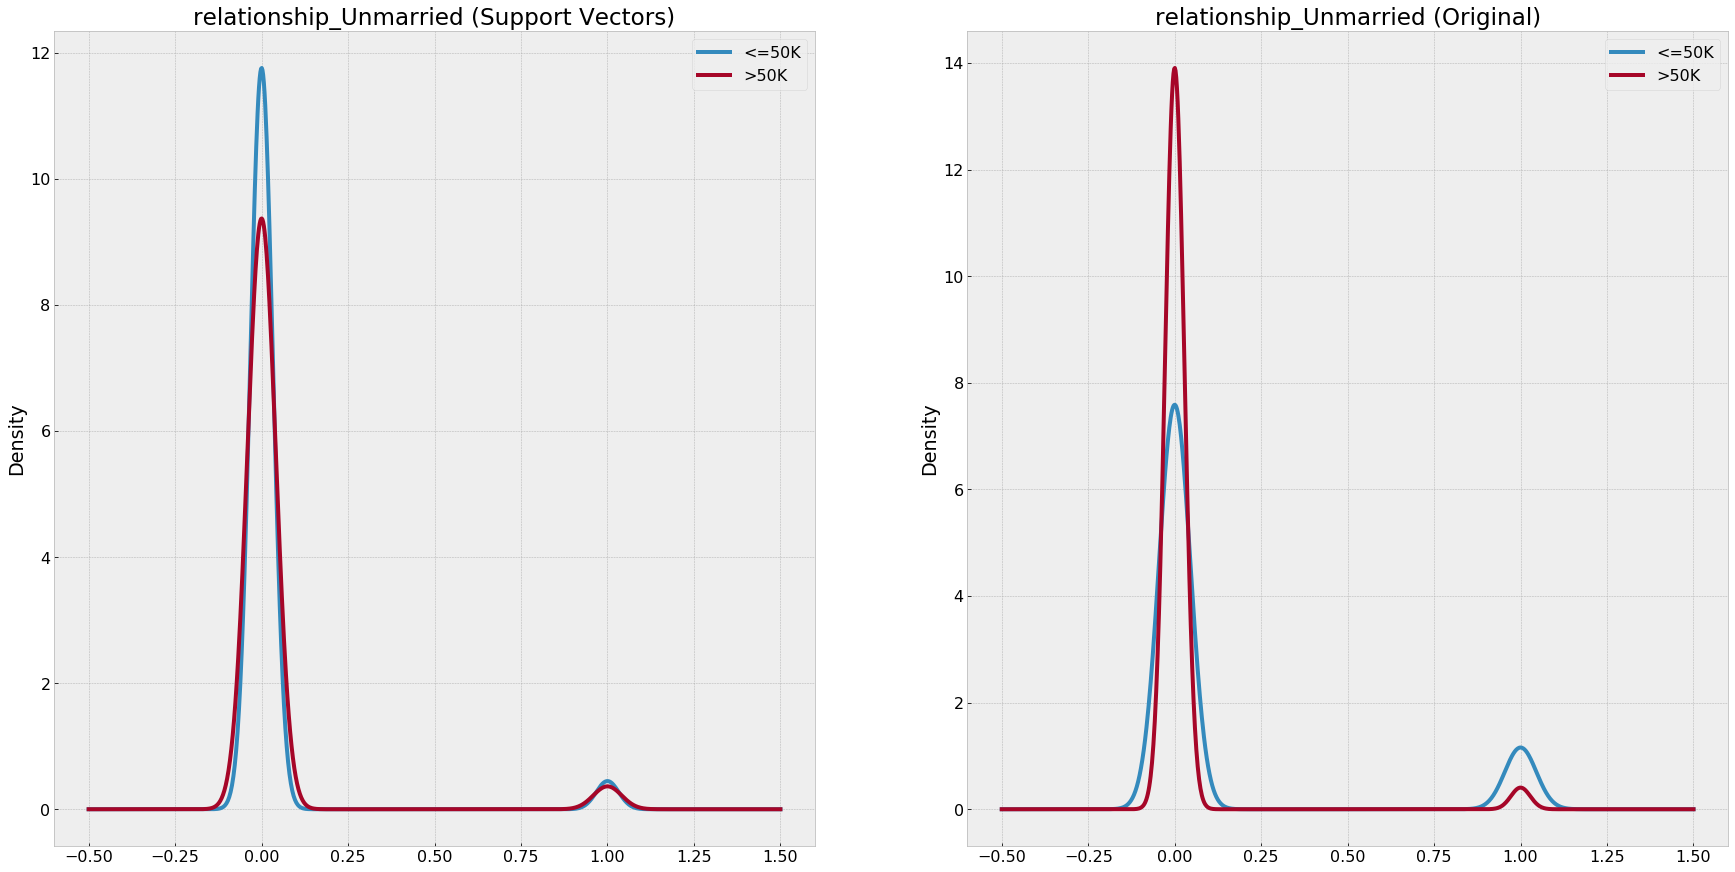

<Figure size 720x288 with 0 Axes>

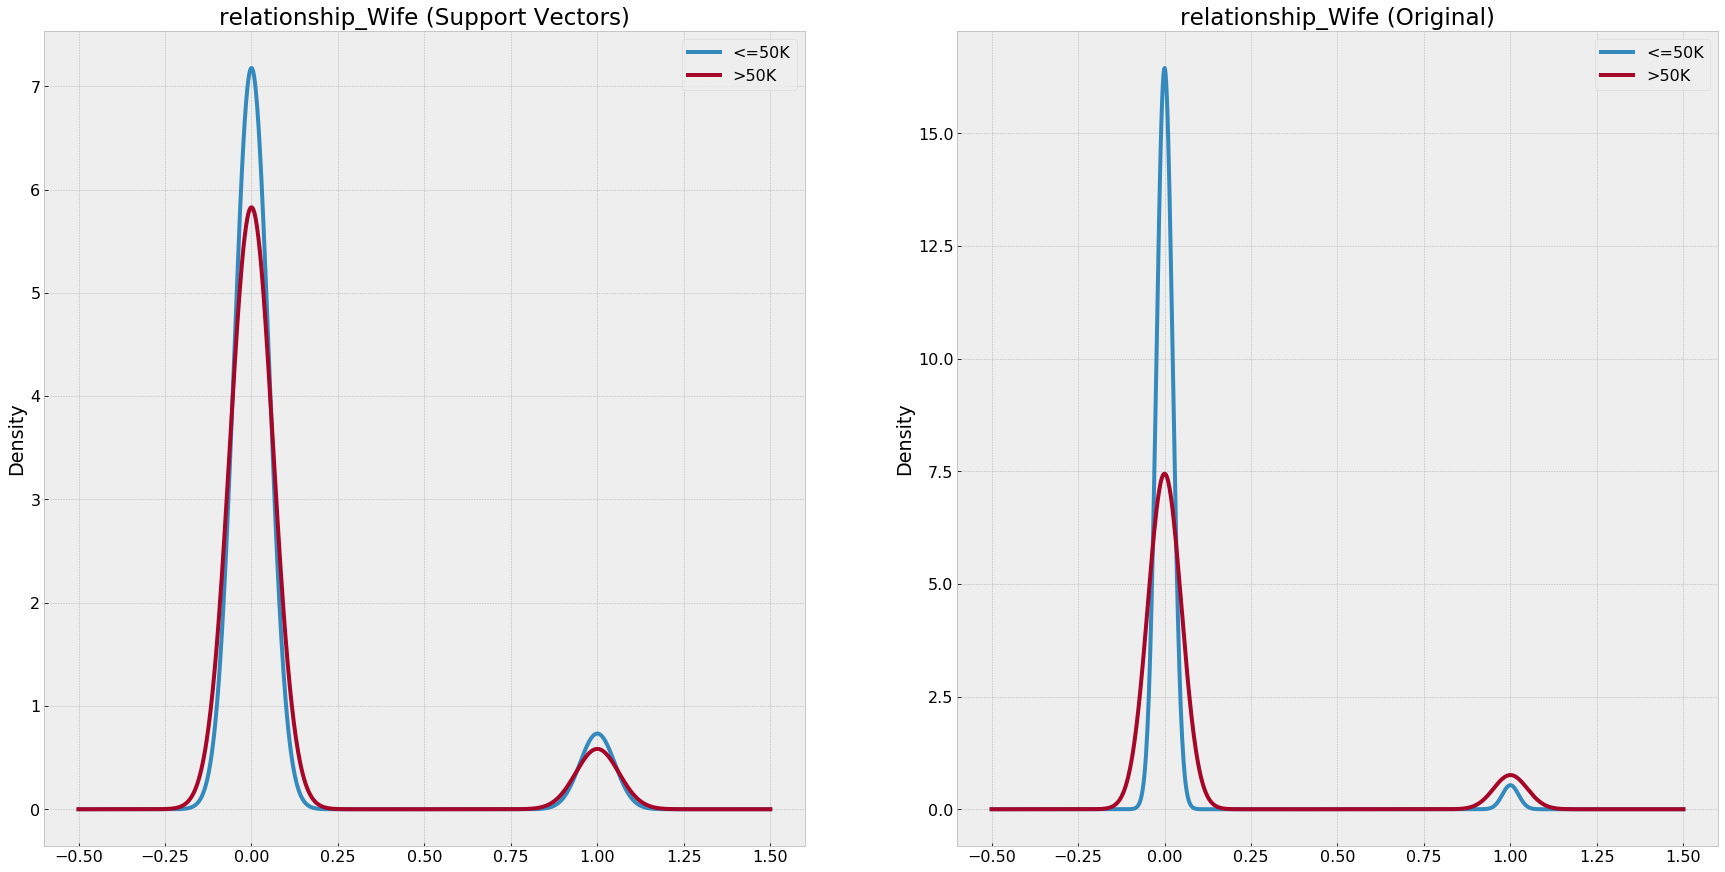

<Figure size 720x288 with 0 Axes>

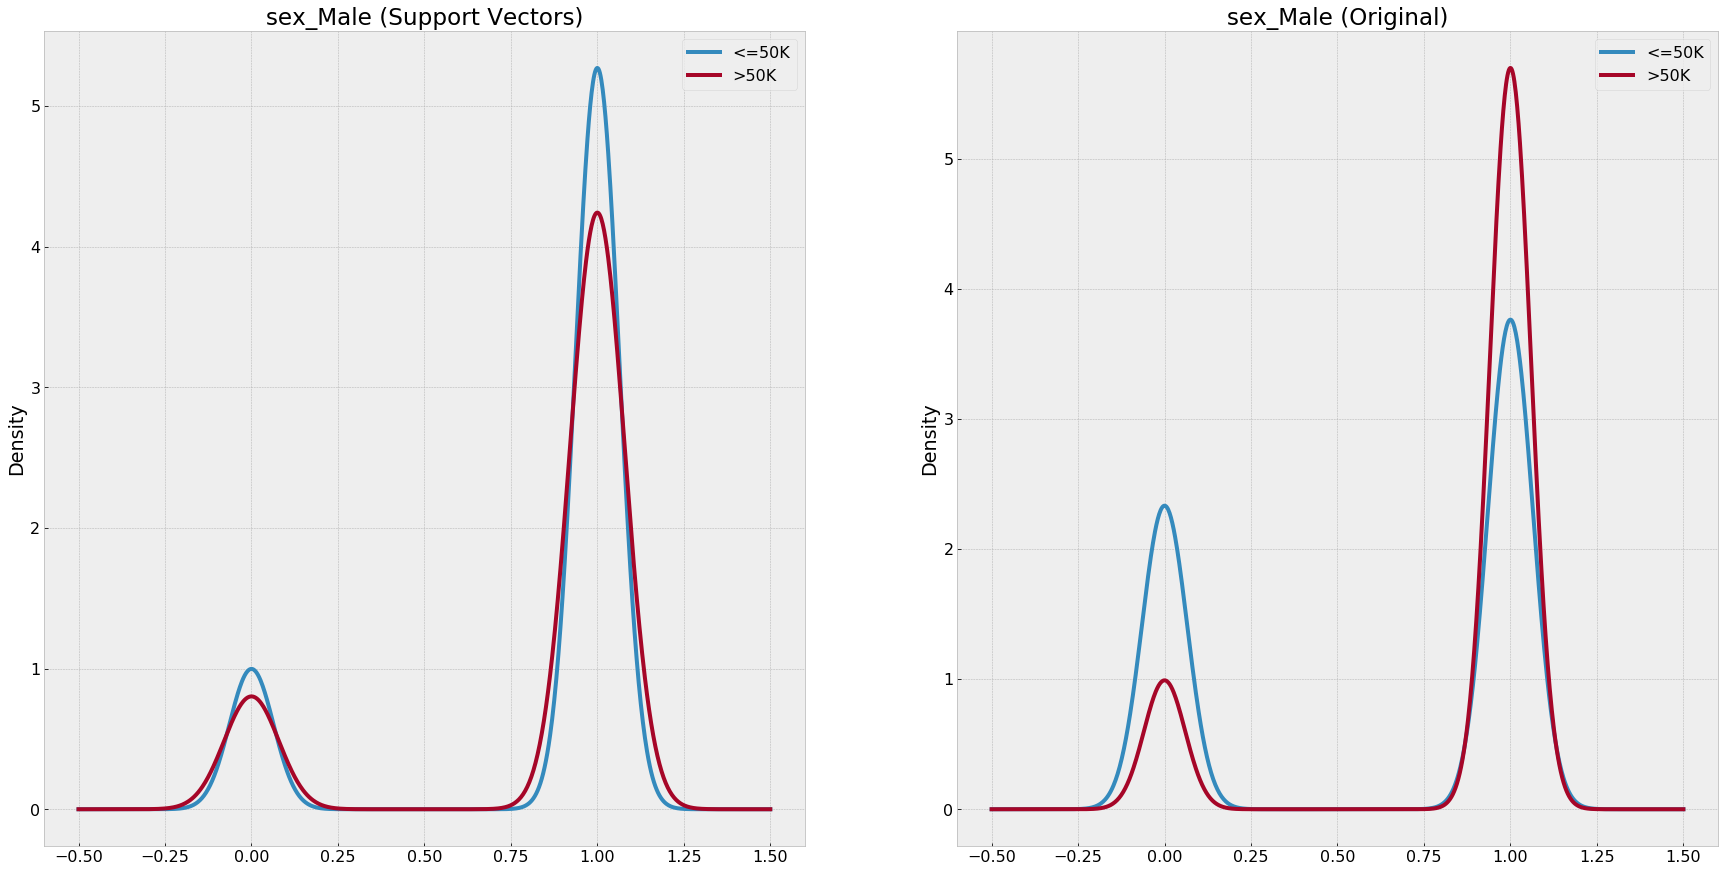

<Figure size 720x288 with 0 Axes>

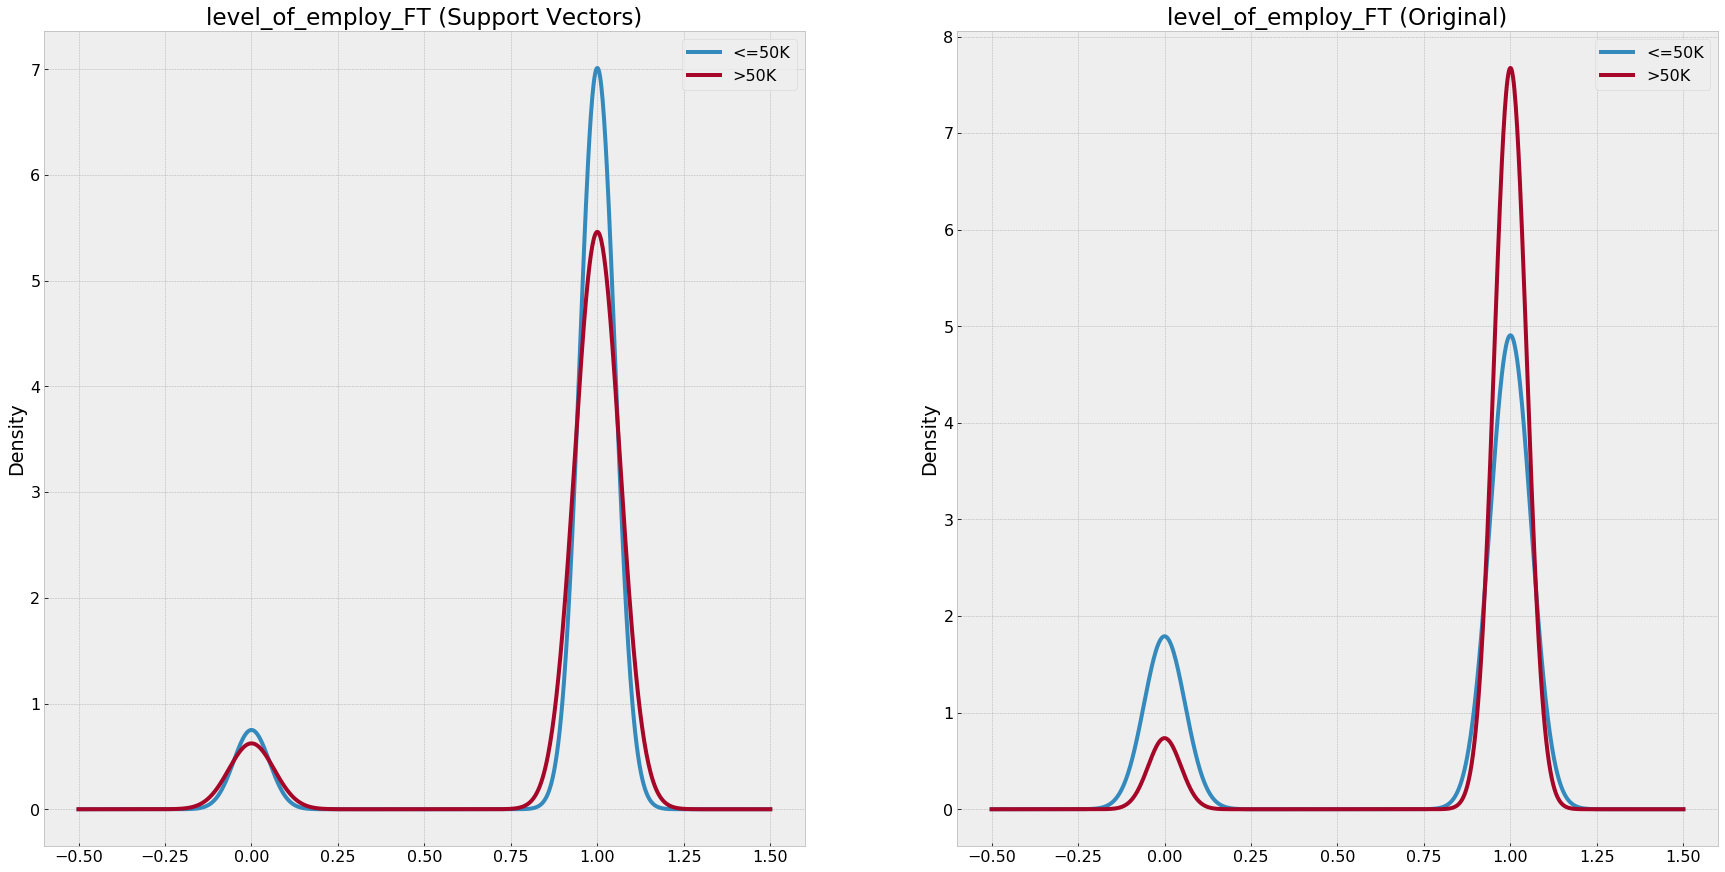

In [23]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

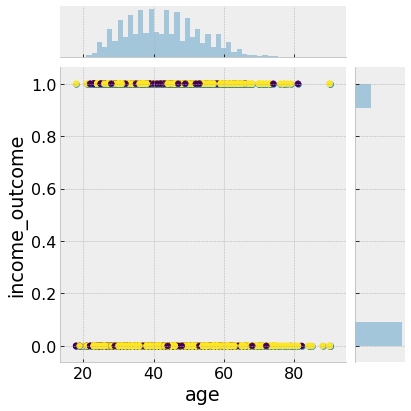

In [24]:
g = sns.jointplot('age','income_outcome',data=df_support) 
g.ax_joint.scatter(df_support.age,df_support.income_outcome, c=df_support.sex_Male)

In [25]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions


svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
#svm_clf = SVC(C=10, kernel='rbf', gamma=10) #terrible scores and long compute times

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    svm_clf.fit(X_train_scaled, y_train)  

    y_hat = svm_clf.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1
    
    

====Iteration 0  ====

Accuracy:  0.8377258412066965 

f1_score: 0.6326454033771107 

precision_score: 0.7174468085106382 

roc_auc_score: 0.7463461745852827 

Confusion Matrix: 

      0    1
0  4211  332
1   647  843 

Train Time:  45.28502961700002 s

====Iteration 1  ====

Accuracy:  0.8539698325874358 

f1_score: 0.6623227290149483 

precision_score: 0.7461139896373057 

roc_auc_score: 0.7656436461736679 

Confusion Matrix: 

      0    1
0  4288  294
1   587  864 

Train Time:  45.43132445100002 s

====Iteration 2  ====

Accuracy:  0.8513177523620089 

f1_score: 0.6606129398410897 

precision_score: 0.7637795275590551 

roc_auc_score: 0.7612183984116478 

Confusion Matrix: 

      0    1
0  4263  270
1   627  873 

Train Time:  44.30499000499998 s



In [26]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

    t = time.process_time()
    
    svm_sgd.fit(X_train_scaled,y_train)
    yhat = svm_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.836399801093983 

f1_score: 0.6143024618991794 

precision_score: 0.7572254335260116 

roc_auc_score: 0.7304571110831339 

Confusion Matrix: 

      0    1
0  4260  252
1   735  786 

Train Time:  0.05892800399999487 s

====Iteration 1  ====

Accuracy:  0.8296038455163268 

f1_score: 0.6003110419906688 

precision_score: 0.7636003956478734 

roc_auc_score: 0.7205555616038982 

Confusion Matrix: 

      0    1
0  4233  239
1   789  772 

Train Time:  0.18803999900001145 s

====Iteration 2  ====

Accuracy:  0.8367313111221615 

f1_score: 0.6126622099882029 

precision_score: 0.741904761904762 

roc_auc_score: 0.7310383109429909 

Confusion Matrix: 

      0    1
0  4269  271
1   714  779 

Train Time:  0.17638155499997765 s



In [27]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    log_sgd.fit(X_train_scaled,y_train)
    yhat = log_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.8292723354881485 

f1_score: 0.5736754966887417 

precision_score: 0.7607025246981339 

roc_auc_score: 0.7061601199769908 

Confusion Matrix: 

      0    1
0  4310  218
1   812  693 

Train Time:  0.2578695299999936 s

====Iteration 1  ====

Accuracy:  0.8377258412066965 

f1_score: 0.6021942299878098 

precision_score: 0.771875 

roc_auc_score: 0.7226739249444177 

Confusion Matrix: 

      0    1
0  4313  219
1   760  741 

Train Time:  0.2610361080000416 s

====Iteration 2  ====

Accuracy:  0.8340792308967346 

f1_score: 0.5939148073022311 

precision_score: 0.7689075630252101 

roc_auc_score: 0.7175672197883827 

Confusion Matrix: 

      0    1
0  4300  220
1   781  732 

Train Time:  0.27282691200002773 s



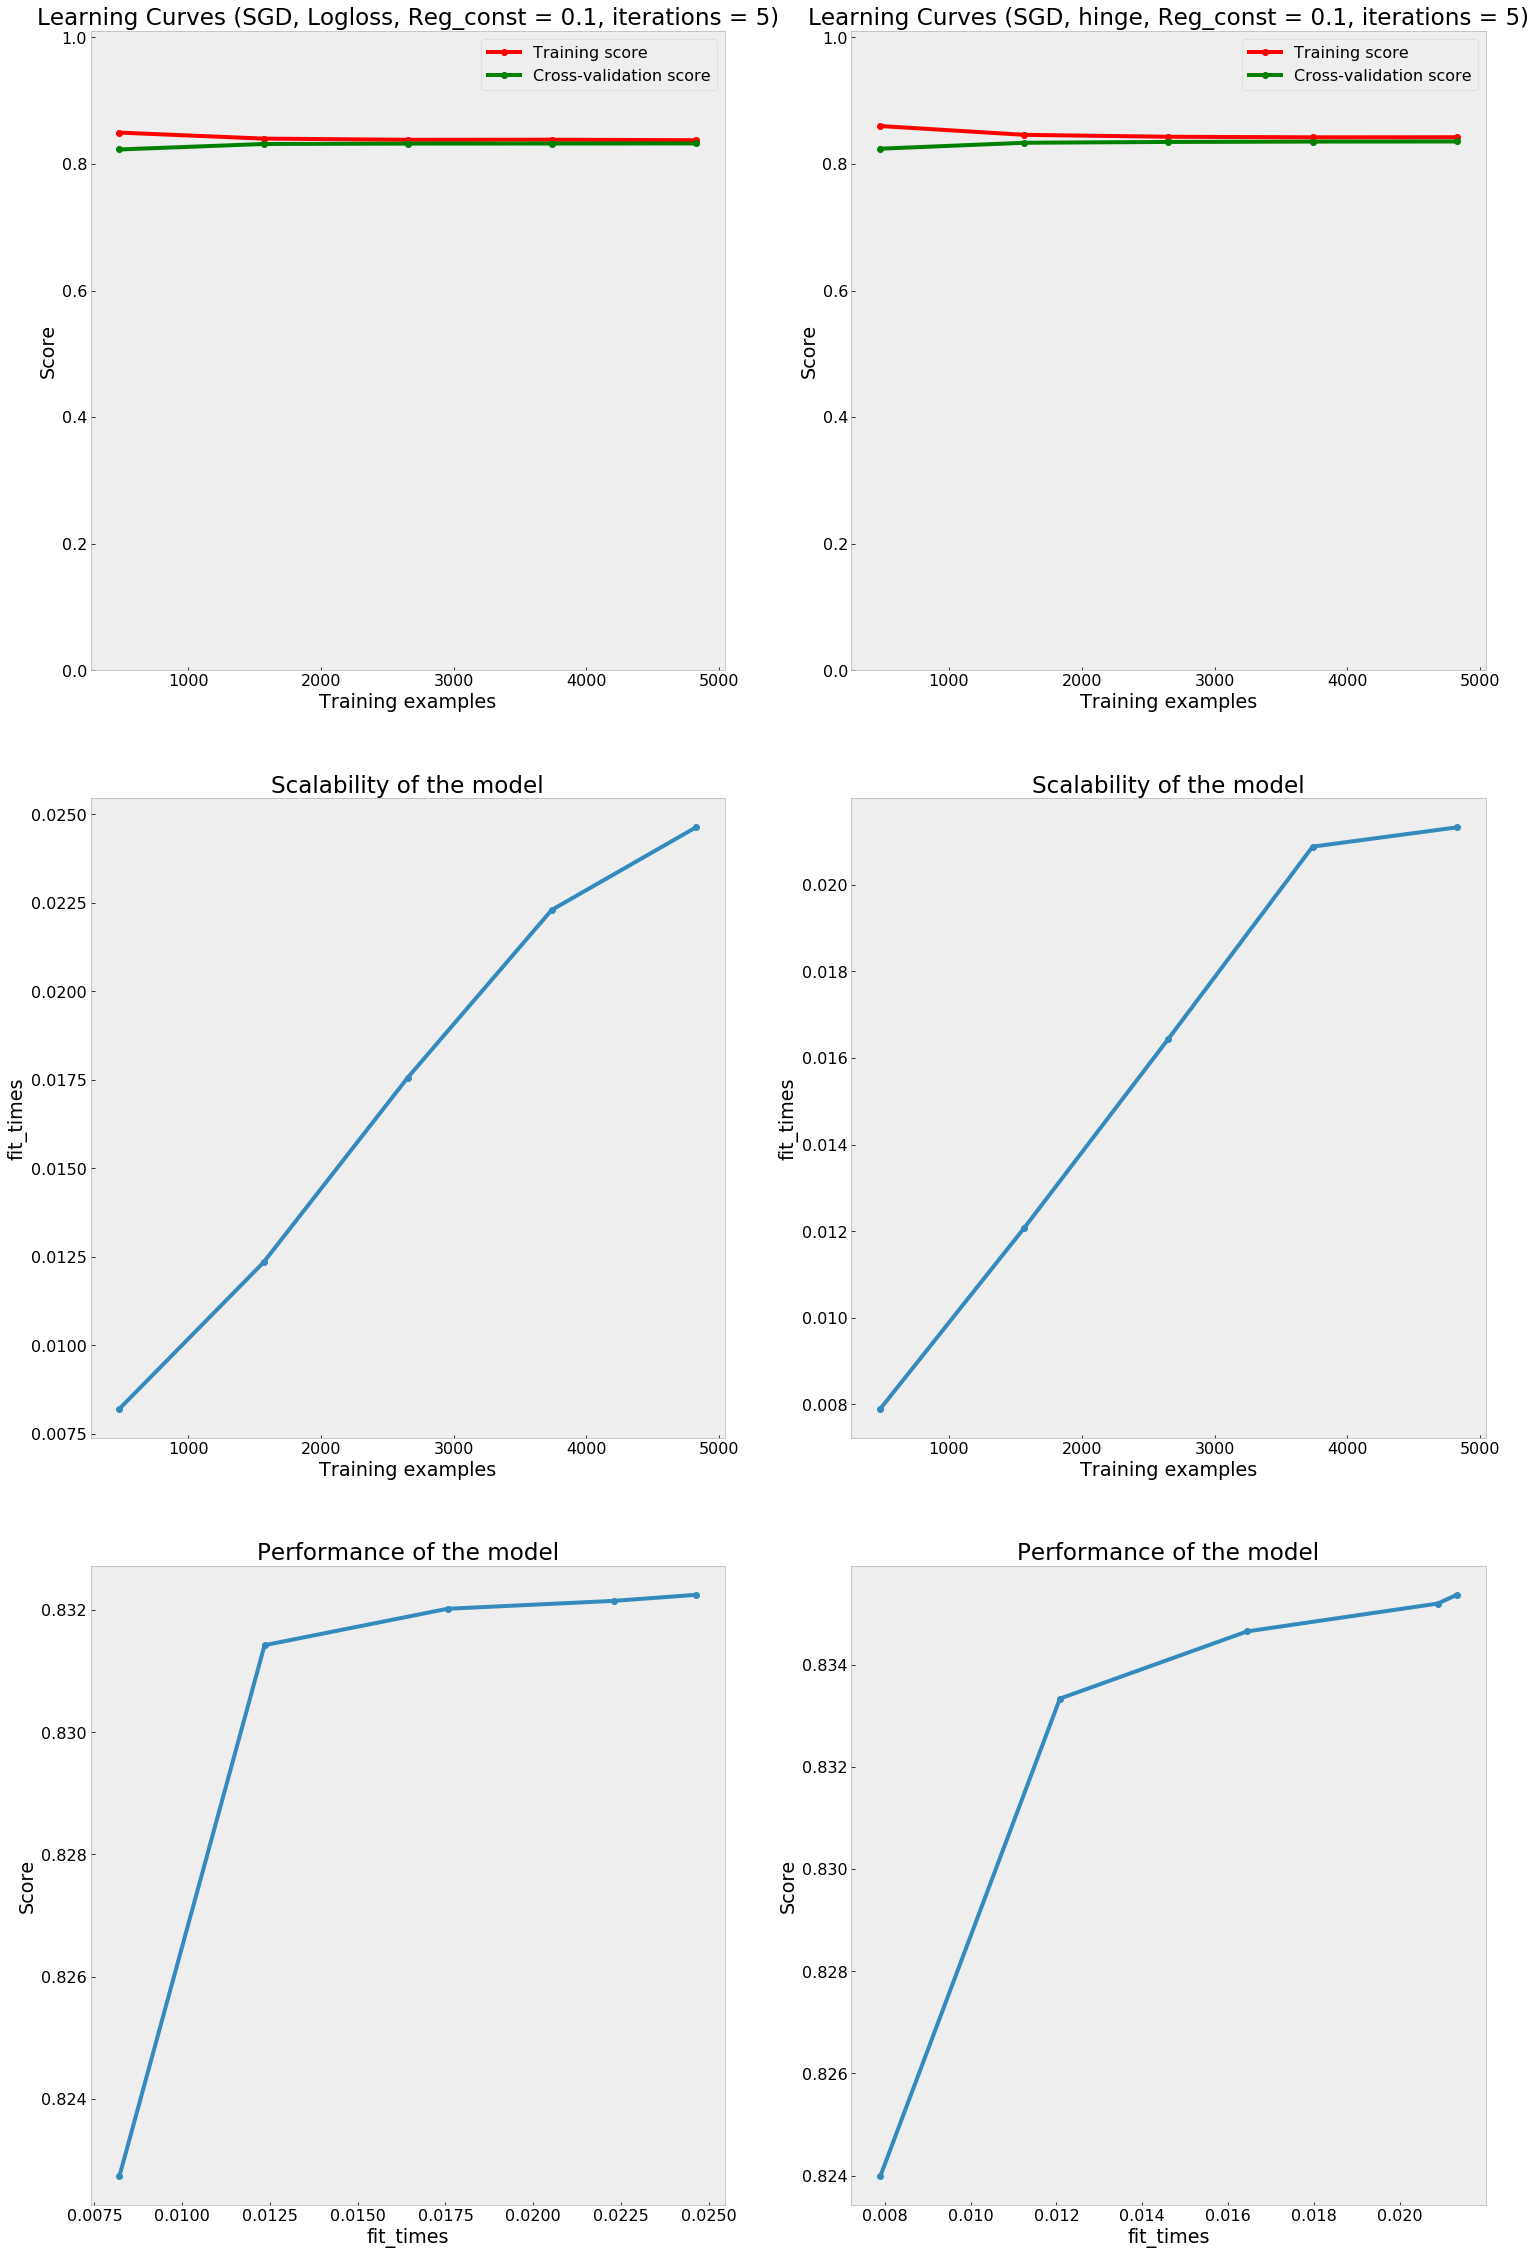

In [41]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()

    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (SGD, Logloss, Reg_const = 0.1, iterations = 5)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (SGD, hinge, Reg_const = 0.1, iterations = 5)"

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

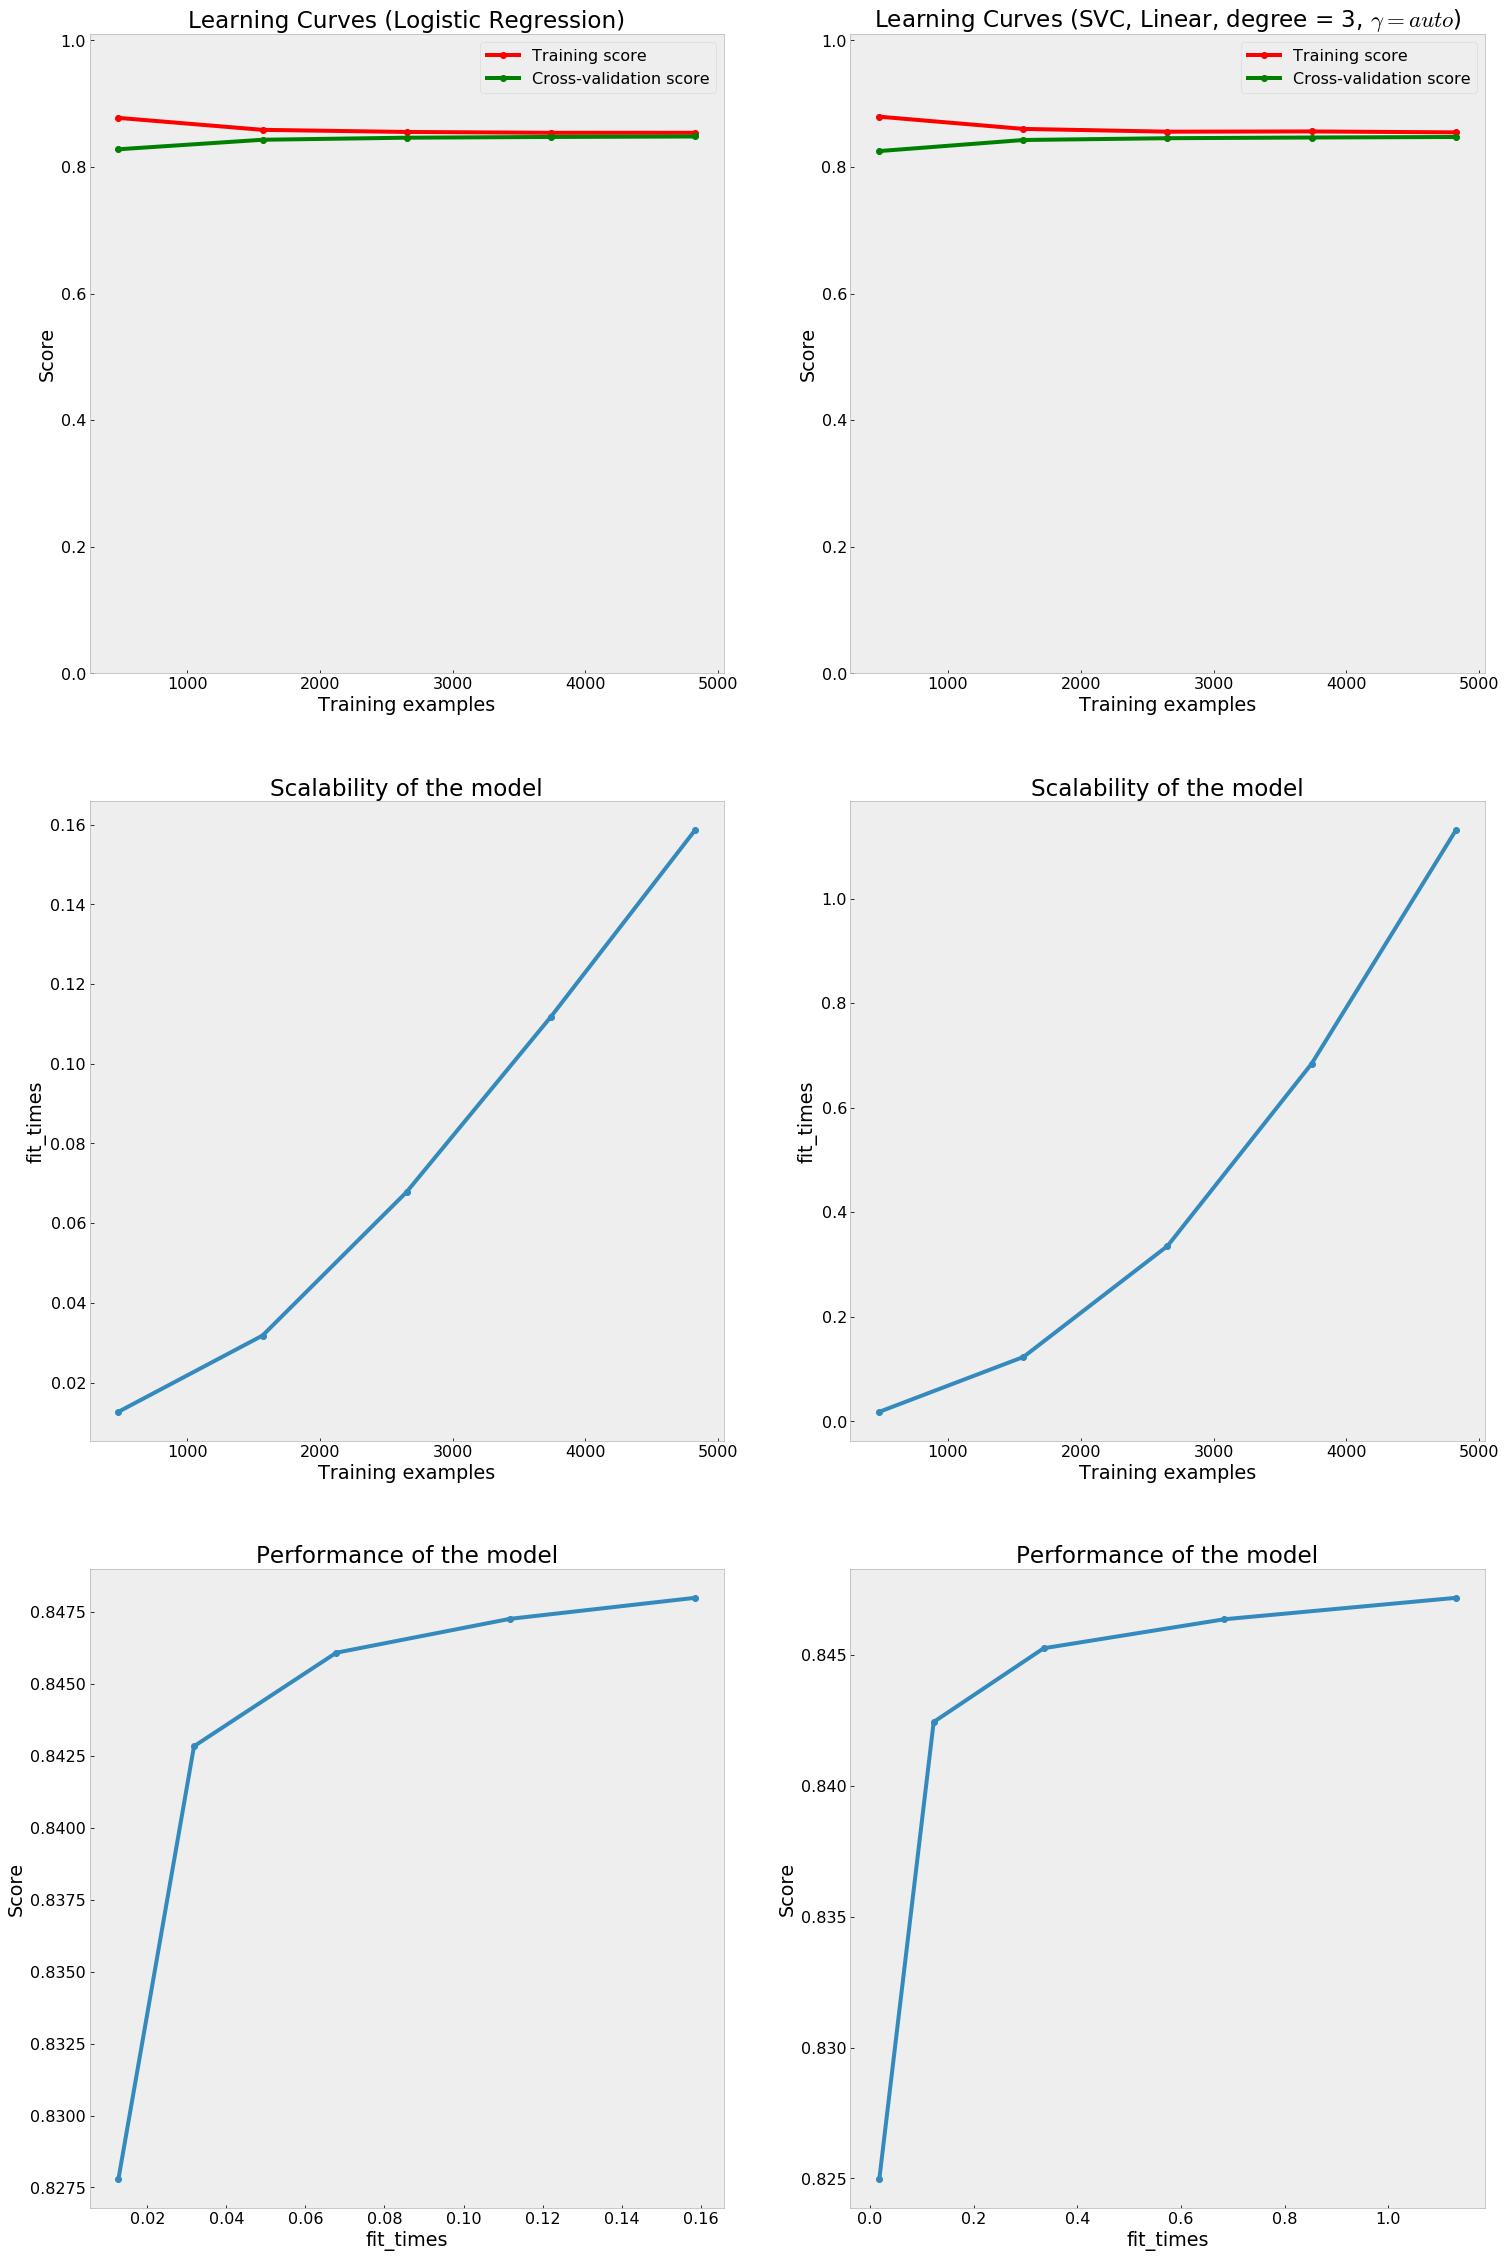

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (SVC, Linear, degree = 3, $\gamma=auto$)"

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

Rubric Sections

https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome
Create Models: 

50 PTS 

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

Model Advantages: 

10 PTS 

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Interpret Feature Importance: 

30 PTS 

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

Interpret Support Vectors: 

10 PTS 

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.